# Практическое задание 2

**Правила**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**, а также `.py`-файлы с реализацией.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Особенности**
* Рассчитано на **три недели**.
* Состоит из **двух частей**. Они **не зависят друг от друга**. 
* Задание большое, и сделать его в последний момент не получится. Поэтому сдача происходит **каждую неделю**. В вашем решении, которое вы сдаете в опредленную неделю, в самом начале ноутбука должно быть указано, что было сделано за эту неделю. При этом за каждую сдачу должно быть сделано не менее 20% задания, иначе будет применен штраф.
* Задание основано на открытых данных. К ним можно найти много ноутбуков с кодом. С ними будет полезно ознакомиться, поучиться чему-то новому, и что-то применить для своего решения. При этом **копирование бОльшей части кода без собственных комментариев и обновления кода будет штрафоваться**.

**Баллы**
* Часть 1 &mdash; 100 баллов.
* Часть 2 &mdash; 100 баллов.
* Всего  &mdash; 200 баллов.

**Общие рекомендации**

* Для всех задач код рекомендуется писать **аккуратный код в одном** `.py`-файле и обращаться к нему в jupyter-ноутбуке как-нибудь так: ``` from my_super_module import gpt5```. Ноутбук используйте для запуска экспериментов, визуализация, комментирования результатов и выводов.

* Скорее всего в процессе выполнения задания вы будете логгировать промежуточные результаты, строить кривые обучения и т.д. Для этого мы рекомендуем присмотреться к инструментам [Weights & Biases](https://wandb.ai/), [Neptune](https://neptune.ai/) и т.п. В случае их использования не забудьте, например, вставить получившиеся графики в ноутбук.

* Используйте [Trainer](https://huggingface.co/docs/transformers/main_classes/trainer) из Hugging Face transformers для обучения моделей. Не стоит строить новый велосипед, ведь вы уже делали это раньше ;)

* В процессе обучения не забывайте делать чекпоинты, например, в google-drive, если пользуетесь Colab.

* В NLP размер модели, а также количество и качестов обучающих данных **имеет значение**. Не стоит брать совсем уж легкие архитектуры. Обучение скорее всего будет занимать не 5-10 минут, этого не стоит бояться. 

* Разумно подойдите к выбору гиперпараметров, исходя из вычислительных ресурсов. Обратите внимание на [пост](https://huggingface.co/docs/transformers/main/en/perf_train_gpu_one), особенно на режим обучения в `fp16`, это позволит увеличить скорость вычислений.

## Часть 1.

В этой части задания вы будете работать с данными недавно завершившегося [соревнования](https://github.com/dialogue-evaluation/RuSentNE-evaluation) по анализу тональности к именованным сущностям в новостных текстах. Посмотрим на описание, которое представлено в репозитории. 

Анализ тональности текста &mdash; извлечение выраженной в тексте эмоциональной оценки к некоторой сущности &mdash; одно из наиболее активно развивающихся направлений в автоматической обработке текстов.

Анализ тональности новостных текстов &mdash; важное направление в области анализа мнений, поскольку обнаружение, отслеживание трендов тональности в новостном потоке важно для построения разного рода аналитических систем, отслеживания имиджа в СМИ конкретных людей или компаний.

Тональность по отношению к сущности в новостном тексте может происходить по крайней мере из трех разных источников:
* мнения автора текста;
* цитируемого мнения, при этом сам носитель мнения может быть упомянут или не упомянут в тексте;
* имплицитного мнения, которое следует из каких-либо упомянутых действий или реакций, например, X уволил Y. Такая информация часто присутствует даже при внешне нейтральном изложении событий.

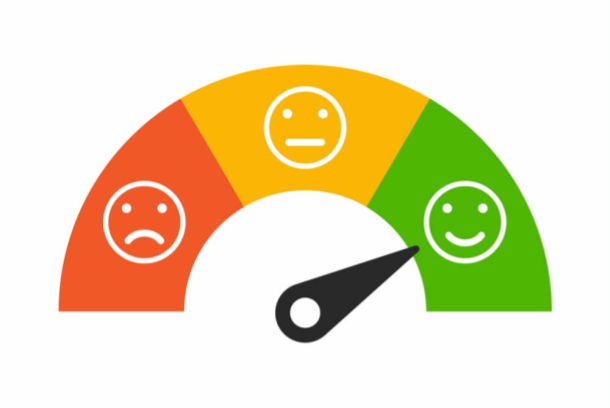

Вам предстоит решить задачу извлечения из новостных текстов тональности трёх классов (негативная, позитивная, нейтральная) по отношению к заранее размеченным сущностям типа `PERSON`, `ORGANIZATION`, `PROFESSION`, `COUNTRY`, `NATIONALITY` в рамках отдельного предложения.

Данные представлены в следующем формате:
* `sentence` &mdash; предложение
* `entity` &mdash; объект анализа тональности
* `entity_tag` &mdash; тип сущности в рамках `PERSON`, `ORGANIZATION`, `PROFESSION`, `COUNTRY`, `NATIONALITY`
* `label` &mdash; метка тональности (0 &mdash; нейтрально, 1 &mdash; отрицательно, 1 &mdash; положительно)

Основной метрикой соревнования является $F_1-macro$ с усреднением по двум классам. Нейтральный класс исключается, т.к. важно выделить именно мнение. Таким образом, процедура оценки следующая:

1. Отдельно вычислить $F_1$ для каждого из классов.
2. Усрденить полученные значения $F_1$ для двух из трех классов.

Предлагается работать с `train` и `dev(val)` выборками. Для начала изучите бейзлайн, используемый авторами. Он содержит реализацию многих вспомогательных вещей, которыми мы на занятиях и в домашних заданиях пользовались через библиотеку `transformers`. Вы может подчерпyуть некоторые моменты, но полностью копировать код бейзлайна **запрещается**.

Обучите свое собственное базовое решение и посчитайте качество на валидации. Подумайте, в каком формате лучше подавать на вход модели используемые данные? Вам может потребоваться добавить спец. тоцены в словарь, сделать это можно, например, [так](https://github.com/huggingface/tokenizers/issues/247).

Попробуйте улучшить качество, проведя, как минимум, **два эксперимента**, в которых вы можете
* использовать другую модель;
* попробовать сделать предсказание не из `[CLS]` токена, а из спец. токена (например `[PERSON]`) сущности **или** из вектора, полученного после пуллинга на токенах (например `['В', '##ася', 'П', '##уп', '##кин']`), которые входят в описание сущности. В этих случаях вход модели может выглядеть как-то так: 
`[CLS] <текст новости> [PERSON] Вася Пупкин [SEP] <продолжение новости> [SEP]`
* найти статьи, релевантные задаче, и попробовать реализовать и применить описанный там метод, например [такой](https://arxiv.org/pdf/2204.04392.pdf). В данном случае разрешается использовать код авторов, если таковой имеется. Свой выбор стоит кратко **обосновать**.

In [ ]:
from IPython.display import clear_output

!pip install transformers
!pip install datasets
!pip install wandb

clear_output()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.nn.utils.rnn import pad_sequence
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModel,
    BertModel,
    DataCollatorWithPadding,
    BertForSequenceClassification,
    BertForTokenClassification,
    AutoModelForMaskedLM,
    BertTokenizer,
    AutoModelForTokenClassification,
    pipeline,
    TrainingArguments,
    Trainer
)

from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.metrics import f1_score, accuracy_score
from tqdm.notebook import tqdm
import locale
from torch.nn import BCELoss, BCEWithLogitsLoss
import wandb
import random

wandb.login()

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

drive.mount('/content/drive', force_remount=True)
clear_output()

In [ ]:
WORK_FOLDER = 'drive/MyDrive/ML/NLP_BHW'
DEVICE_NUM = 0
DEVICE = f"cuda:{DEVICE_NUM}" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 16
EPOCHS=20

In [ ]:
train_df = pd.read_csv(f'{WORK_FOLDER}/train_data.csv', sep='\t')
valid_labeled_df = pd.read_csv(f'{WORK_FOLDER}/validation_data_labeled.csv',  sep='\t')

In [ ]:
train_df.head(10)

,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label
0,"Джеймс «Бадди» Макгирт (James (Buddy) McGirt, ...",спортсмена,PROFESSION,86,96,0
1,«За всю нашу долгую карьеру нам довелось играт...,музыкантов,PROFESSION,258,268,0
2,"Ранее, 7 декабря, толпа болельщиков перекрыла ...",Егоре Свиридове,PERSON,175,190,0
3,"В субботу, 21 июля 2018 года, на арене СК «Оли...",россиянина,NATIONALITY,122,132,0
4,Представитель талибов Забиулла Муджахид в твит...,американских захватчика,PROFESSION,109,132,-1
5,"Астронавт Пирс Селлерс, который брал с собой в...",Пирс Селлерс,PERSON,10,22,0
6,Президент США Дональд Трамп охарактеризовал си...,Президент США,PROFESSION,0,13,0
7,"По словам Мнучина, «Мадуро цепляется за Кубу, ...",Мадуро,PERSON,20,26,-1
8,Поводом для возможного задержания якобы стали ...,Макафи,PERSON,72,78,-1
9,Джон Леннон был убит в 1980 году одним из его ...,охранником,PROFESSION,66,76,0


In [ ]:
train_df.sentence[0]

'Джеймс «Бадди» Макгирт (James (Buddy) McGirt, тренер Дадашева упрашивал дагестанского спортсмена остановить бой, но тот хотел продолжать.'

In [ ]:
train_df.isna().any()

sentence                False
entity                  False
entity_tag              False
entity_pos_start_rel    False
entity_pos_end_rel      False
label                   False
dtype: bool

In [ ]:
valid_labeled_df.isna().any()

sentence                False
entity                  False
entity_tag              False
entity_pos_start_rel    False
entity_pos_end_rel      False
label                   False
dtype: bool

### *1. Моя бейзлайн модель*

In [ ]:
print(
    'Пример неагативного текста: ', train_df.iloc[4, 0], '\n', train_df.iloc[4, 1]
)

Пример неагативного текста:  Представитель талибов Забиулла Муджахид в твиттер-аккаунте 30 апреля заявил, что в провинции Каписа убито 2 «американских захватчика» и 3 афганских силовика, множество ранено. 
 американских захватчика


In [ ]:
print(
    'Пример нейтрального текста: ', train_df.iloc[6, 0], '\n', train_df.iloc[6, 1]
)

Пример нейтрального текста:  Президент США Дональд Трамп охарактеризовал ситуацию с Северной Кореей, как «очень опасную», однако выразил надежду на то, что кризис удастся разрешить. 
 Президент США


In [ ]:
print(
    'Пример позитивного текста: ', train_df.iloc[63, 0], '\n', train_df.iloc[63, 1]
)

Пример позитивного текста:  Однако в письме в поддержку Пекина, напротив, говорится о «выдающихся достижениях Китая в сфере защиты прав человека». 
 Китая


*Я просмотрела визуально текст в датасете, и заметила, что даже негативно помеченные тексты написаны достаточно нейтрально. Такое ощущение, что большинство текстов взяты из официальных новостных источников. Причем негативный окрас не совсем связан с эмоциональностью текста, а больше неким определенным социально-политическим контекстом. Это может быть важно, например, в выборе токенизатора и модели. Например, модель обученная на комментариях, где люди намного эмоциональнее выражают мнение, может предсказывать предложения их этого датасета почти всегда как нейтральные. Посмотрим дальше, как получится.*

*Начинаю с простой токенизации из коробки, беру токенизатор из самой популярной модели, котороая обучена на "Russian part of Wikipedia and news data"*

In [ ]:
def map_labels(x):
    if x == -1:
        return 0
    elif x == 0:
        return 1
    elif x == 1:
        return 2

train_df['label'] = train_df['label'].map(map_labels)
valid_labeled_df['label'] = valid_labeled_df['label'].map(map_labels)

In [ ]:
model_name = "DeepPavlov/rubert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
clear_output()

In [ ]:
tokenized_train = tokenizer(
    train_df["sentence"].tolist(), 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)
train_input_ids, train_masks = (
    tokenized_train["input_ids"],
    tokenized_train["attention_mask"],
)
train_labels = torch.tensor(train_df["label"]).unsqueeze(-1)

tokenized_valid = tokenizer(
    valid_labeled_df["sentence"].tolist(),
    padding=True,
    truncation=True,
    return_tensors="pt",
)
valid_input_ids, valid_masks = (
    tokenized_valid["input_ids"],
    tokenized_valid["attention_mask"],
)
valid_labels = torch.tensor(valid_labeled_df["label"]).unsqueeze(-1)

train_dataset = TensorDataset(train_input_ids, train_masks, train_labels)
val_dataset = TensorDataset(valid_input_ids, valid_masks, valid_labels)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


*Базовую модель беру BertForSequenceClassification, так как она будет предсказывать sentiment для всего текста*

In [ ]:
base_model = BertForSequenceClassification.from_pretrained(
    model_name, 
    num_labels = 3,
    output_attentions = False, 
    output_hidden_states = False
)

base_model.to(DEVICE)
clear_output()

In [ ]:
class MyDataCollator:
    def __call__(self, batch):
        return {
            "input_ids": torch.stack([t[0] for t in batch]),
            "attention_mask": torch.stack([t[1] for t in batch]),
            "labels": torch.stack([t[2] for t in batch]),
        }


def f1_macro_score(preds):
    y_true = preds.label_ids
    y_pred = preds.predictions.argmax(-1)
    scores = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2], zero_division=0)
    return {"F1_PN": (scores[0] + scores[2]) / 2}


def compute_loss(model, inputs, return_outputs=False):
    outputs = model(inputs["input_ids"], inputs["attention_mask"])
    logits = outputs.logits
    labels_one_hot = F.one_hot(inputs["labels"], num_classes=model.num_labels).view(
        -1, model.num_labels
    )
    bse_loss = BCEWithLogitsLoss()
    loss = bse_loss(logits, labels_one_hot.float())
    if return_outputs:
        return loss, outputs
    return loss


training_args = TrainingArguments(
    output_dir=f"{WORK_FOLDER}/Runs",
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    logging_dir=f"{WORK_FOLDER}/Runs",
    remove_unused_columns=False,
    label_names=["labels"],
    include_inputs_for_metrics=True,
    evaluation_strategy="steps",
    eval_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=base_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=MyDataCollator(),
    compute_metrics=f1_macro_score
)

trainer.compute_loss = compute_loss
trainer.train()

In [ ]:
trainer.save_model(f'{WORK_FOLDER}/Runs')

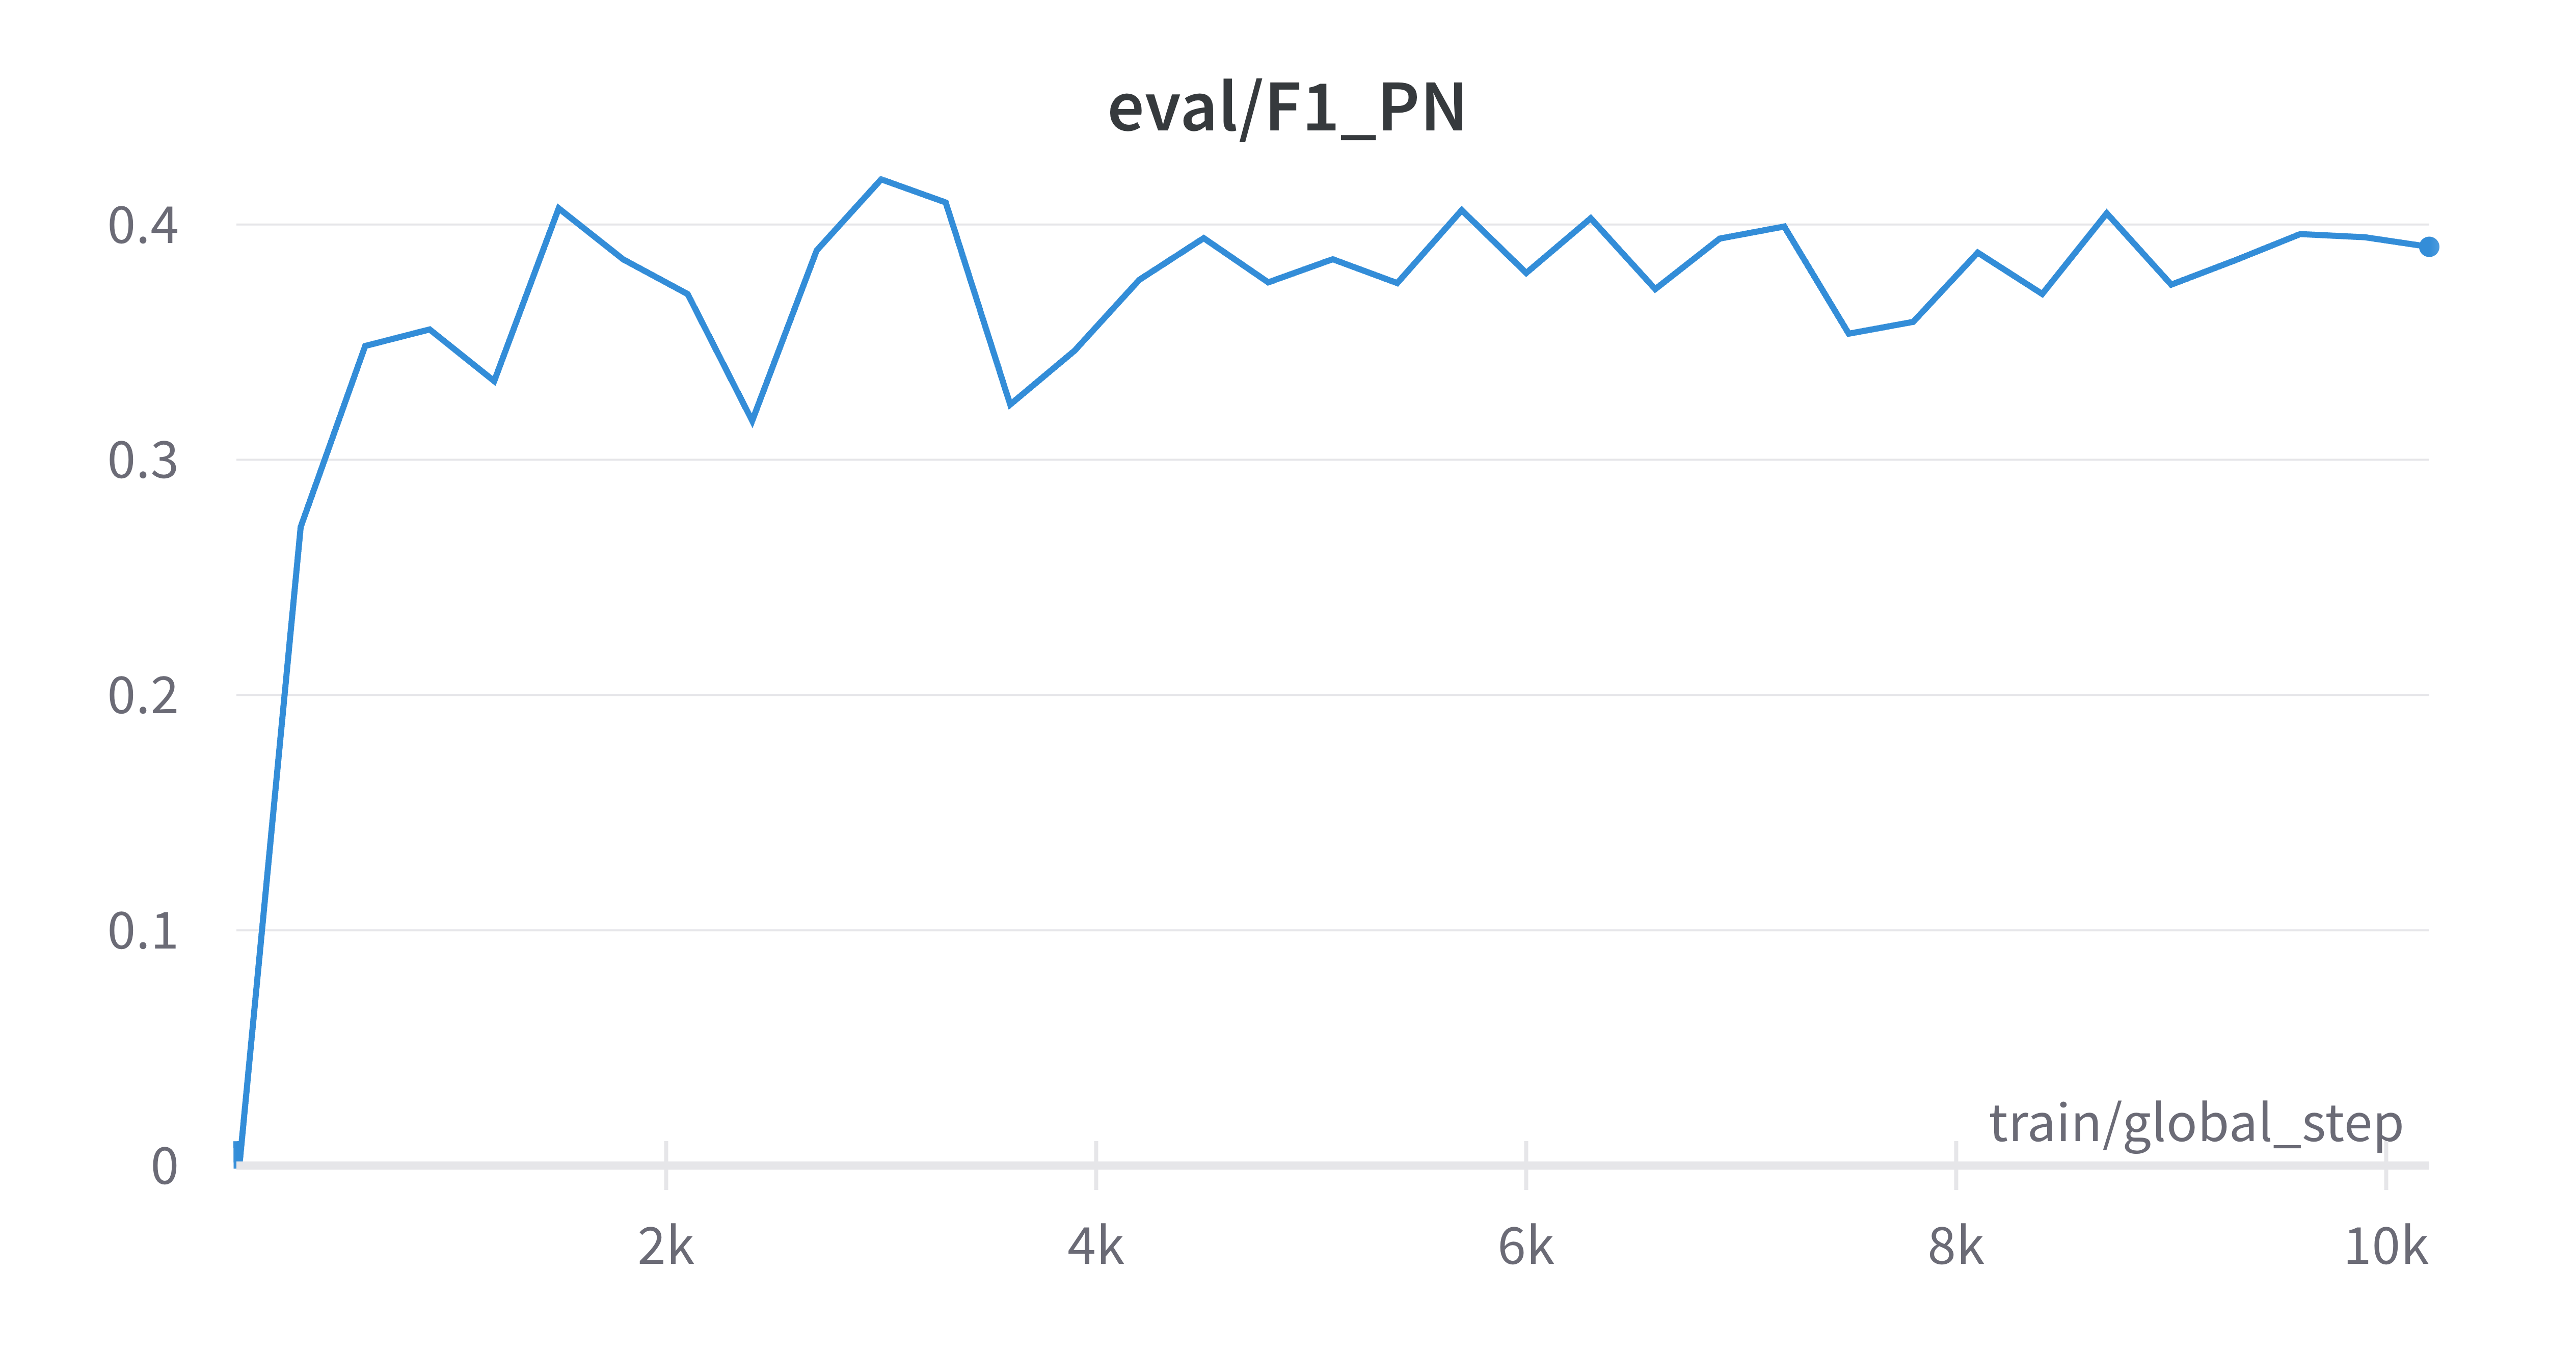

*На одной из итераций получился скор лучше чем у бейзлайн модели авторов: у них это 40.92%, у меня 41.92%*

### *2. Вторая модель*

*Пробуем добавить новые спец токены в токенайзер, так что выходная послед-ть будет выглядеть как `[CLS] <текст новости> [PERSON] Вася Пупкин [SEP] <продолжение новости> [SEP]`, чтобы делать предсказание из этих токенов. Так же, так как тут уже переходим к entity sentiment, то используем модель для классификации токенов*

In [ ]:
special_tokens_dict = {
    'additional_special_tokens': list(map(lambda tag: f'[{tag}]', train_df.entity_tag.unique()))
}
num_added_toks = tokenizer.add_special_tokens(special_tokens_dict)

*Добавляем токены в предложения*

In [ ]:
def add_token(text, special_token, start_pos, end_pos):
    return text[:start_pos] + f'[{special_token}]' + ' ' + text[start_pos:end_pos] + text[end_pos:]

train_df['sentence'] = train_df.apply(
    lambda x: add_token(
        x['sentence'], x['entity_tag'], x['entity_pos_start_rel'], 
        x['entity_pos_end_rel']
        ), axis=1)

valid_labeled_df['sentence'] = valid_labeled_df.apply(
    lambda x: add_token(
        x['sentence'], x['entity_tag'], x['entity_pos_start_rel'], 
        x['entity_pos_end_rel']
        ), axis=1)

In [ ]:
def get_entity_token_idx(token_ids, special_token):
    id = tokenizer.convert_tokens_to_ids(special_token)
    return np.where(token_ids == id)[0]

*Токенизируем и сохраняем позиции entity токенов*

In [ ]:
tokenized_train = tokenizer(
    train_df["sentence"].tolist(), padding=True, truncation=True, return_tensors="pt"
)
train_input_ids, train_masks = (
    tokenized_train["input_ids"],
    tokenized_train["attention_mask"],
)
train_labels = torch.tensor(train_df["label"]).unsqueeze(-1)
train_entity_token_idxes = list(map(
    lambda p: get_entity_token_idx(p[0], p[1]),
    zip(
        train_input_ids, 
        train_df["entity_tag"].apply(lambda t: f'[{t}]')
    )
))

train_entity_token_idxes = torch.tensor(train_entity_token_idxes)


tokenized_valid = tokenizer(
    valid_labeled_df["sentence"].tolist(),
    padding=True,
    truncation=True,
    return_tensors="pt",
)
valid_input_ids, valid_masks = (
    tokenized_valid["input_ids"],
    tokenized_valid["attention_mask"],
)
valid_labels = torch.tensor(valid_labeled_df["label"]).unsqueeze(-1)
valid_entity_token_idxes = list(map(
    lambda p: get_entity_token_idx(p[0], p[1]),
    zip(
        valid_input_ids, 
        valid_labeled_df["entity_tag"].apply(lambda t: f'[{t}]')
    )
))
valid_entity_token_idxes = torch.tensor(valid_entity_token_idxes)


train_dataset = TensorDataset(train_input_ids, train_masks, train_labels, train_entity_token_idxes)
val_dataset = TensorDataset(valid_input_ids, valid_masks, valid_labels, valid_entity_token_idxes)

*Меняем логику forward*

In [ ]:
pretrained = BertForTokenClassification.from_pretrained(
            model_name,
            return_dict = True,
            num_labels = 3
)
clear_output()

In [ ]:
def choose_logits_for_entity_tokens(logits, entity_token_idxs):
    res = torch.tensor([]).to(DEVICE)
    curr_batch_size = logits.shape[0]
    for i in range(curr_batch_size):
        c = logits[i, entity_token_idxs[i], :]
        res = torch.cat((res, c), dim=0)
    return res.view(curr_batch_size, 3)

class CustomBertForTokenClassification(BertForTokenClassification):
    def __init__(self, config):
        super().__init__(config)
        self.pretrained = pretrained
        self.pretrained.resize_token_embeddings(len(tokenizer))

    def forward(self, input_ids, attention_mask, token_idx, **kwargs):       
        outputs = self.pretrained(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        logits = choose_logits_for_entity_tokens(logits, token_idx)
        return logits

model = CustomBertForTokenClassification.from_pretrained(
    model_name, 
    num_labels = 3,
    output_attentions = False, 
    output_hidden_states = False
)

model.to(DEVICE)
clear_output()

In [ ]:
EPOCHS = 20

class SpecialDataCollator:
    def __call__(self, batch):
        return {
            "input_ids": torch.stack([t[0] for t in batch]),
            "attention_mask": torch.stack([t[1] for t in batch]),
            "labels": torch.stack([t[2] for t in batch]),
            "token_idx": torch.stack([t[3] for t in batch]),
        }

class CustomTrainer(Trainer):
    num_labels = 3

    def compute_loss(self, model, inputs, return_outputs=False):
        outputs = model(**inputs)
        logits = outputs
        labels_one_hot = F.one_hot(inputs["labels"], num_classes=model.num_labels).view(
            -1, model.num_labels
        )
        bse_loss = BCEWithLogitsLoss()
        loss = bse_loss(logits, labels_one_hot.float())
        if return_outputs:
            return (loss, {'logits': outputs, 'loss': loss})
        return loss

training_args = TrainingArguments(
    output_dir=f"{WORK_FOLDER}/Runs",
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    logging_dir=f"{WORK_FOLDER}/Runs",
    remove_unused_columns=False,
    label_names=["labels"],
    include_inputs_for_metrics=True,
    evaluation_strategy="steps",
    eval_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True
)

def compute_metrics(preds):    
    y_true = preds.label_ids.reshape(-1)
    y_pred = preds.predictions.argmax(-1)
    scores = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2], zero_division=0)
    return {
        "F1_PN": (scores[0] + scores[2]) / 2,
        "Accuracy": accuracy_score(y_true, y_pred)
        }

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset, 
    compute_metrics=compute_metrics,
    data_collator=SpecialDataCollator(),
)

In [ ]:
trainer.train()

*Как бы я ни пыталась, метрика на всех эпохах выглядит вот так. Бага в коде нет - но модель предсказывает только 1 класс*

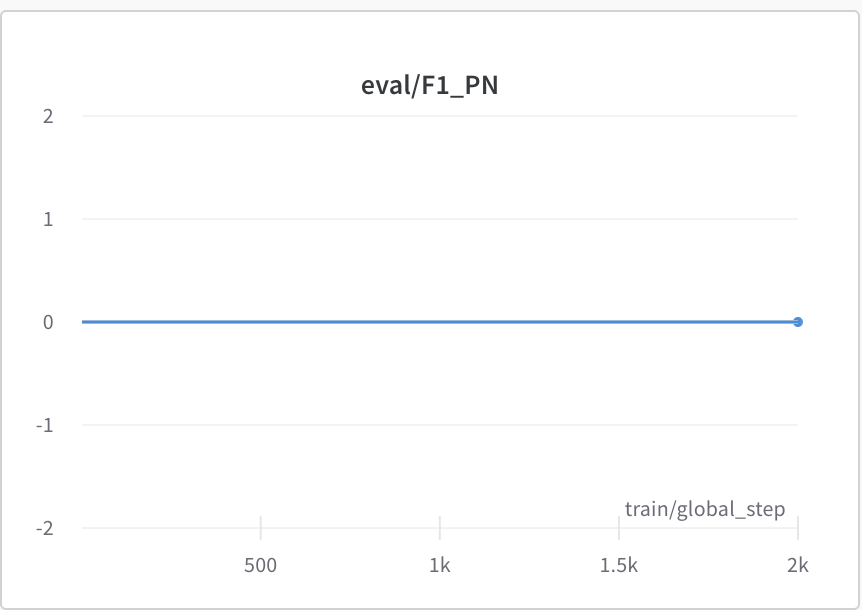



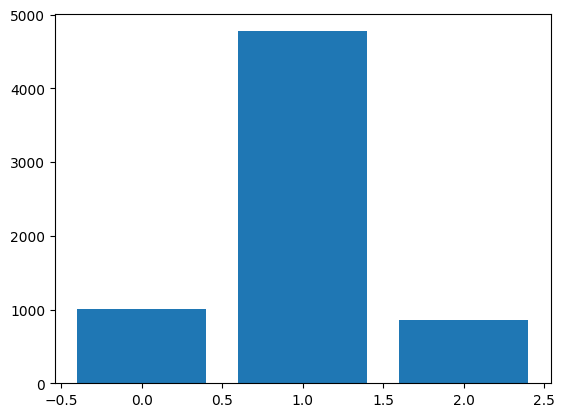

In [ ]:
group = train_df.groupby(['label'])
plt.bar(group.count().index, group.count().iloc[:, 0].tolist());

*Ой-ой, дисбаланс сильный, как бы показывает нам fuck you. Попробуем это исправить. Так как датасеты небольшие, сделаем oversampling*

In [ ]:
class_count_1, class_count_0, class_count_2 = train_df['label'].value_counts()

class_0 = train_df[train_df['label'] == 0]
class_1 = train_df[train_df['label'] == 1]
class_2 = train_df[train_df['label'] == 2]

class_0_over = class_0.sample(class_count_1, replace=True)
class_2_over = class_2.sample(class_count_1, replace=True)

train_df_balanced = pd.concat([
    class_0_over, class_1, class_2_over
    ], axis=0).sample(frac=1)

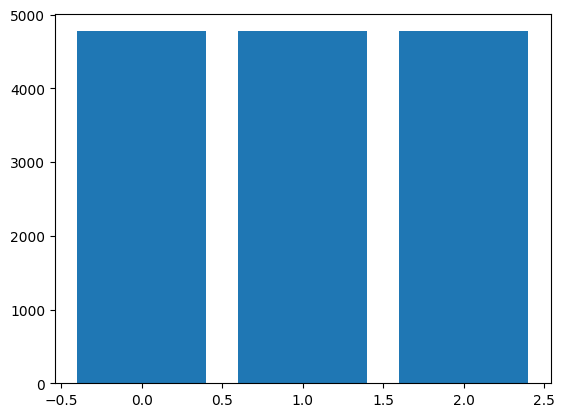

In [ ]:
group = train_df_balanced.groupby(['label'])
plt.bar(group.count().index, group.count().iloc[:, 0].tolist());

In [ ]:
class_count_1, class_count_0, class_count_2 = valid_labeled_df['label'].value_counts()

class_0 = valid_labeled_df[valid_labeled_df['label'] == 0]
class_1 = valid_labeled_df[valid_labeled_df['label'] == 1]
class_2 = valid_labeled_df[valid_labeled_df['label'] == 2]

class_0_over = class_0.sample(class_count_1, replace=True)
class_2_over = class_2.sample(class_count_1, replace=True)

valid_df_balanced = pd.concat([
    class_0_over, class_1, class_2_over
    ], axis=0).sample(frac=1)

*Шеф, запускай всё по новой! (извините за копипаст)*

In [ ]:
tokenized_train = tokenizer(
    train_df_balanced["sentence"].tolist(), padding=True, truncation=True, return_tensors="pt"
)
train_input_ids, train_masks = (
    tokenized_train["input_ids"],
    tokenized_train["attention_mask"],
)
train_labels = torch.tensor(train_df_balanced["label"], dtype=int).unsqueeze(-1)
train_entity_token_idxes = list(map(
    lambda p: get_entity_token_idx(p[0], p[1]),
    zip(
        train_input_ids, 
        train_df_balanced["entity_tag"].apply(lambda t: f'[{t}]')
    )
))

train_entity_token_idxes = torch.tensor(train_entity_token_idxes)


tokenized_valid = tokenizer(
    valid_df_balanced["sentence"].tolist(),
    padding=True,
    truncation=True,
    return_tensors="pt",
)
valid_input_ids, valid_masks = (
    tokenized_valid["input_ids"],
    tokenized_valid["attention_mask"],
)
valid_labels = torch.tensor(valid_df_balanced["label"], dtype=int).unsqueeze(-1)
valid_entity_token_idxes = list(map(
    lambda p: get_entity_token_idx(p[0], p[1]),
    zip(
        valid_input_ids, 
        valid_df_balanced["entity_tag"].apply(lambda t: f'[{t}]')
    )
))
valid_entity_token_idxes = torch.tensor(valid_entity_token_idxes)


train_dataset = TensorDataset(train_input_ids, train_masks, train_labels, train_entity_token_idxes)
val_dataset = TensorDataset(valid_input_ids, valid_masks, valid_labels, valid_entity_token_idxes)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
<ipython-input-15-f510a9e76507>:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  train_entity_token_idxes = torch.tensor(train_entity_token_idxes)


In [ ]:
EPOCHS = 20

class SpecialDataCollator:
    def __call__(self, batch):
        return {
            "input_ids": torch.stack([t[0] for t in batch]),
            "attention_mask": torch.stack([t[1] for t in batch]),
            "labels": torch.stack([t[2] for t in batch]),
            "token_idx": torch.stack([t[3] for t in batch]),
        }

class CustomTrainer(Trainer):
    num_labels = 3

    def compute_loss(self, model, inputs, return_outputs=False):
        outputs = model(**inputs)
        logits = outputs
        labels_one_hot = F.one_hot(inputs["labels"], num_classes=model.num_labels).view(
            -1, model.num_labels
        )
        bse_loss = BCEWithLogitsLoss()
        loss = bse_loss(logits, labels_one_hot.float())
        if return_outputs:
            return (loss, {'logits': outputs, 'loss': loss})
        return loss

training_args = TrainingArguments(
    output_dir=f"{WORK_FOLDER}/Runs",
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    logging_dir=f"{WORK_FOLDER}/Runs",
    remove_unused_columns=False,
    label_names=["labels"],
    include_inputs_for_metrics=True,
    evaluation_strategy="steps",
    eval_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True
)

def compute_metrics(preds):    
    y_true = preds.label_ids.reshape(-1)
    y_pred = preds.predictions.argmax(-1)
    scores = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2], zero_division=0)
    return {
        "F1_PN": (scores[0] + scores[2]) / 2,
        "Accuracy": accuracy_score(y_true, y_pred)
        }

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset, 
    compute_metrics=compute_metrics,
    data_collator=SpecialDataCollator(),
)

In [ ]:
trainer.train()

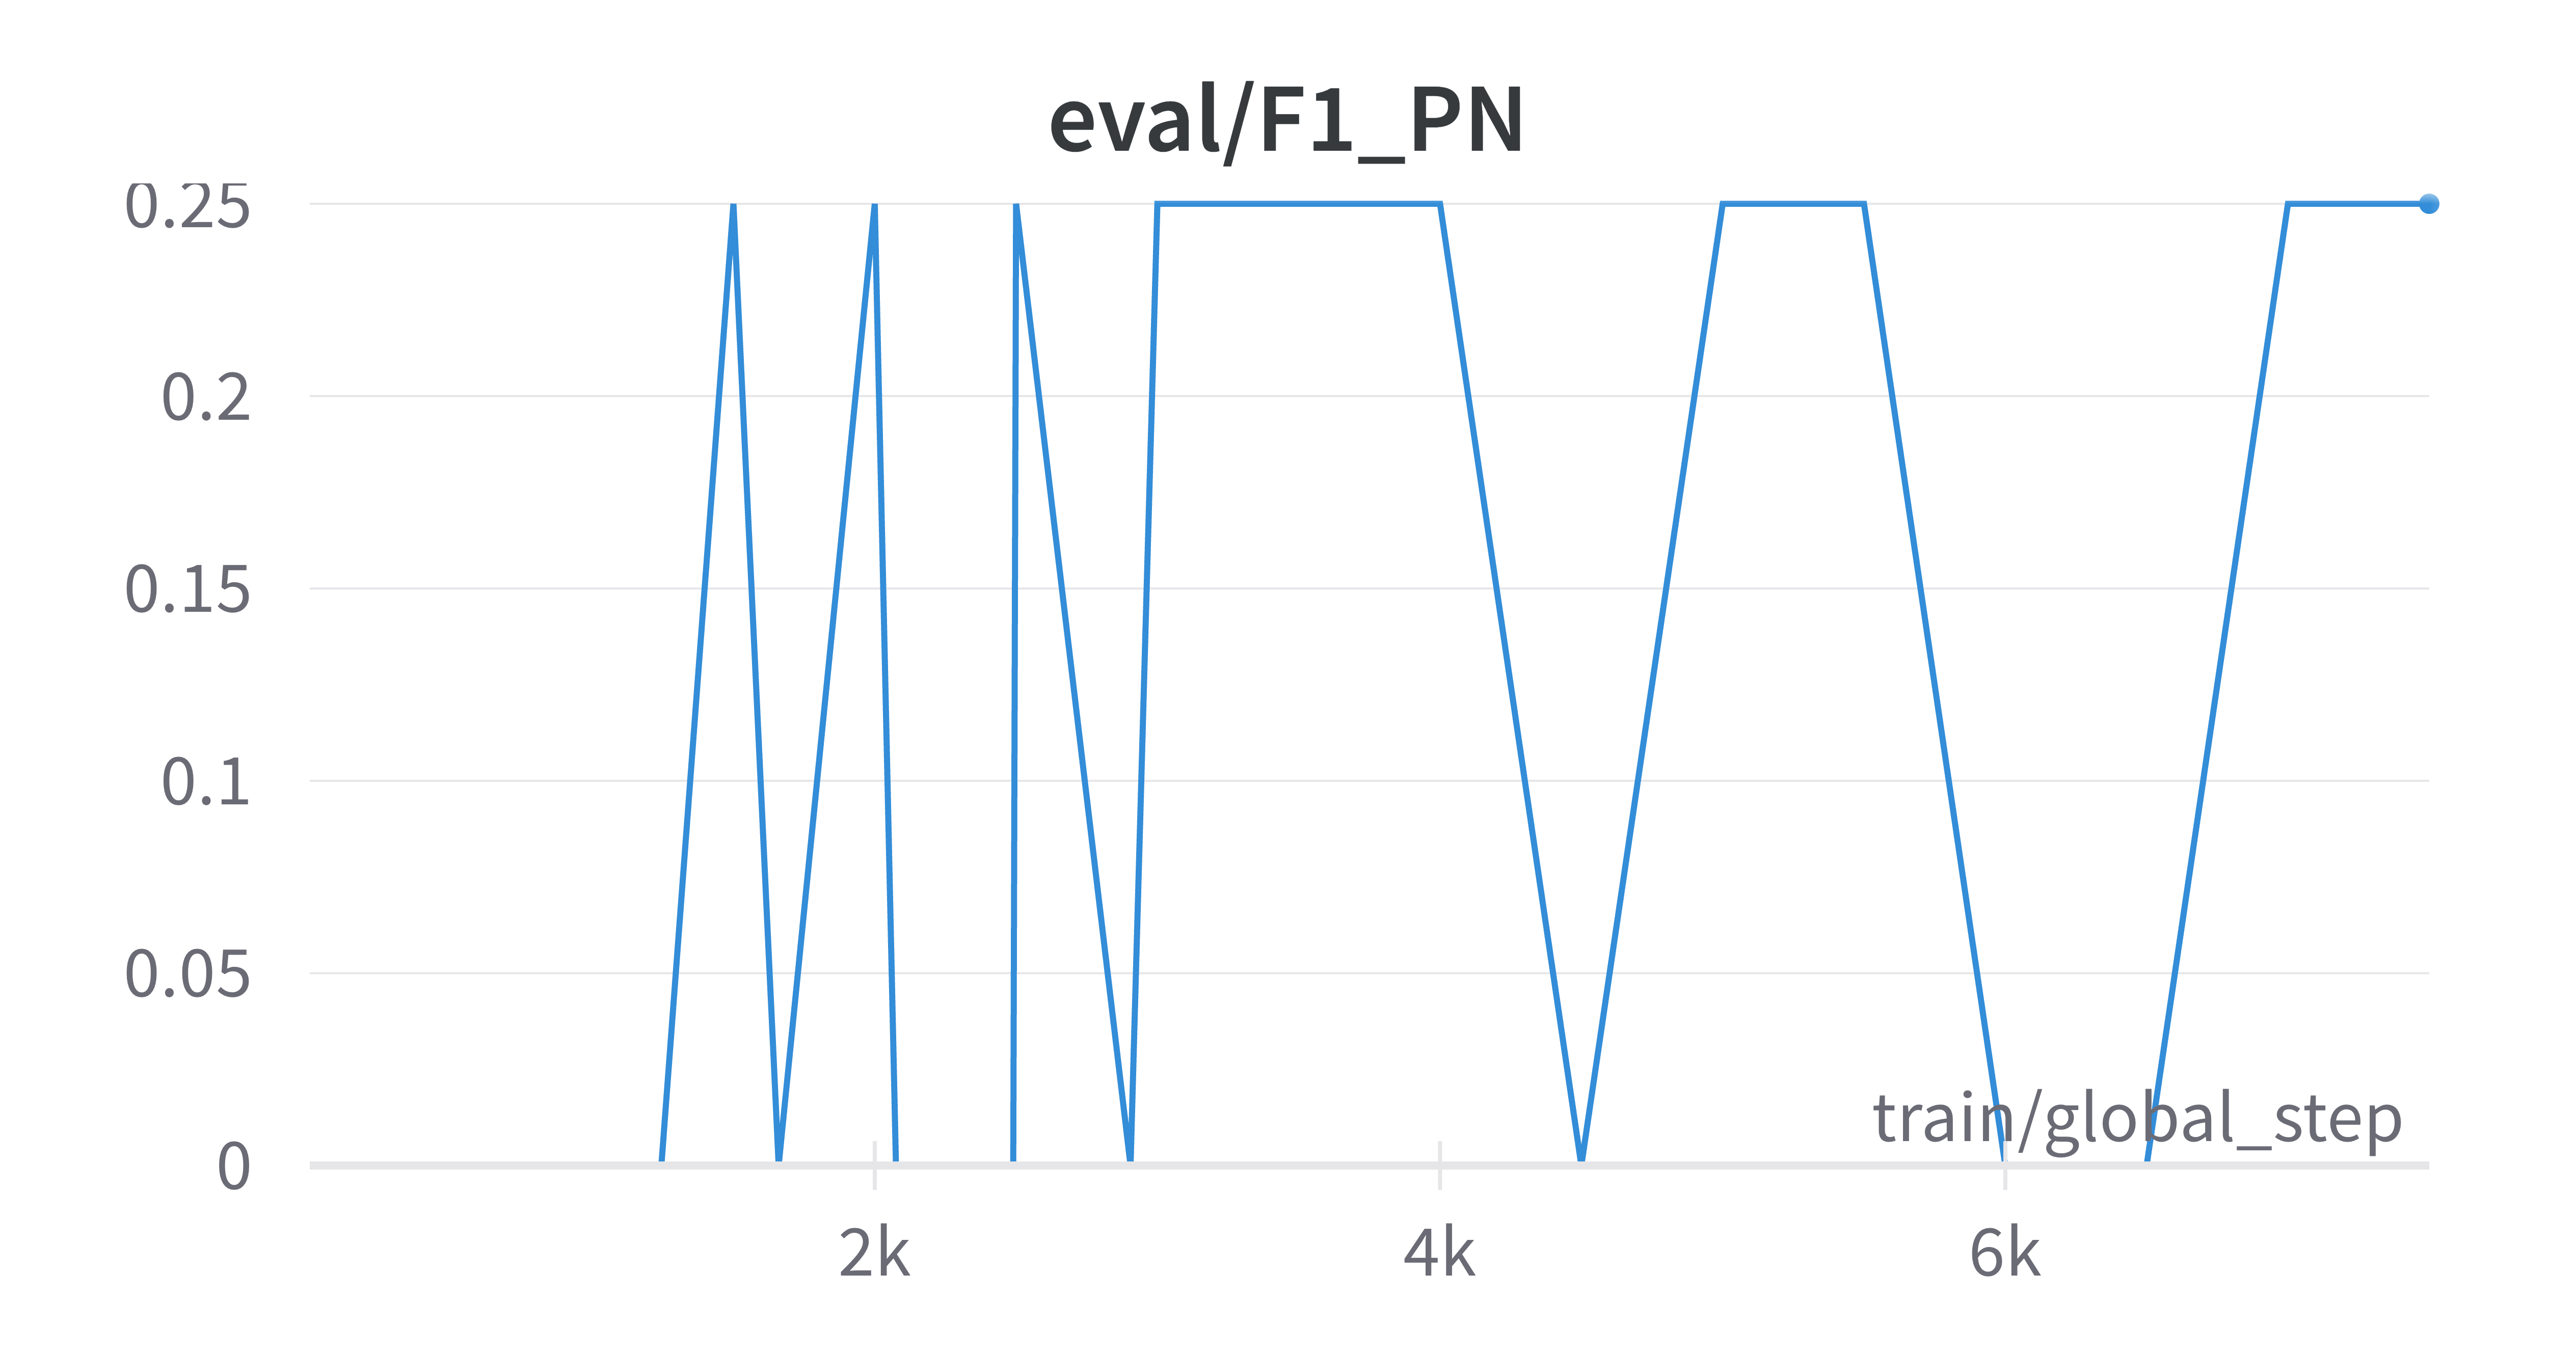

*Есть улучшение, теперь F1 колеблется от 0 до 0.25. Но все равно хуже базовой модели. Попробую поменять какие-нибудь гиперпараметры, самое важное - снизить learning rate*

In [ ]:
training_args.warmup_steps = 500
training_args.weight_decay = 0.01
training_args.learning_rate = 1e-6
training_args.num_train_epochs=10

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset, 
    compute_metrics=compute_metrics,
    data_collator=SpecialDataCollator(),
)

In [ ]:
trainer.train()

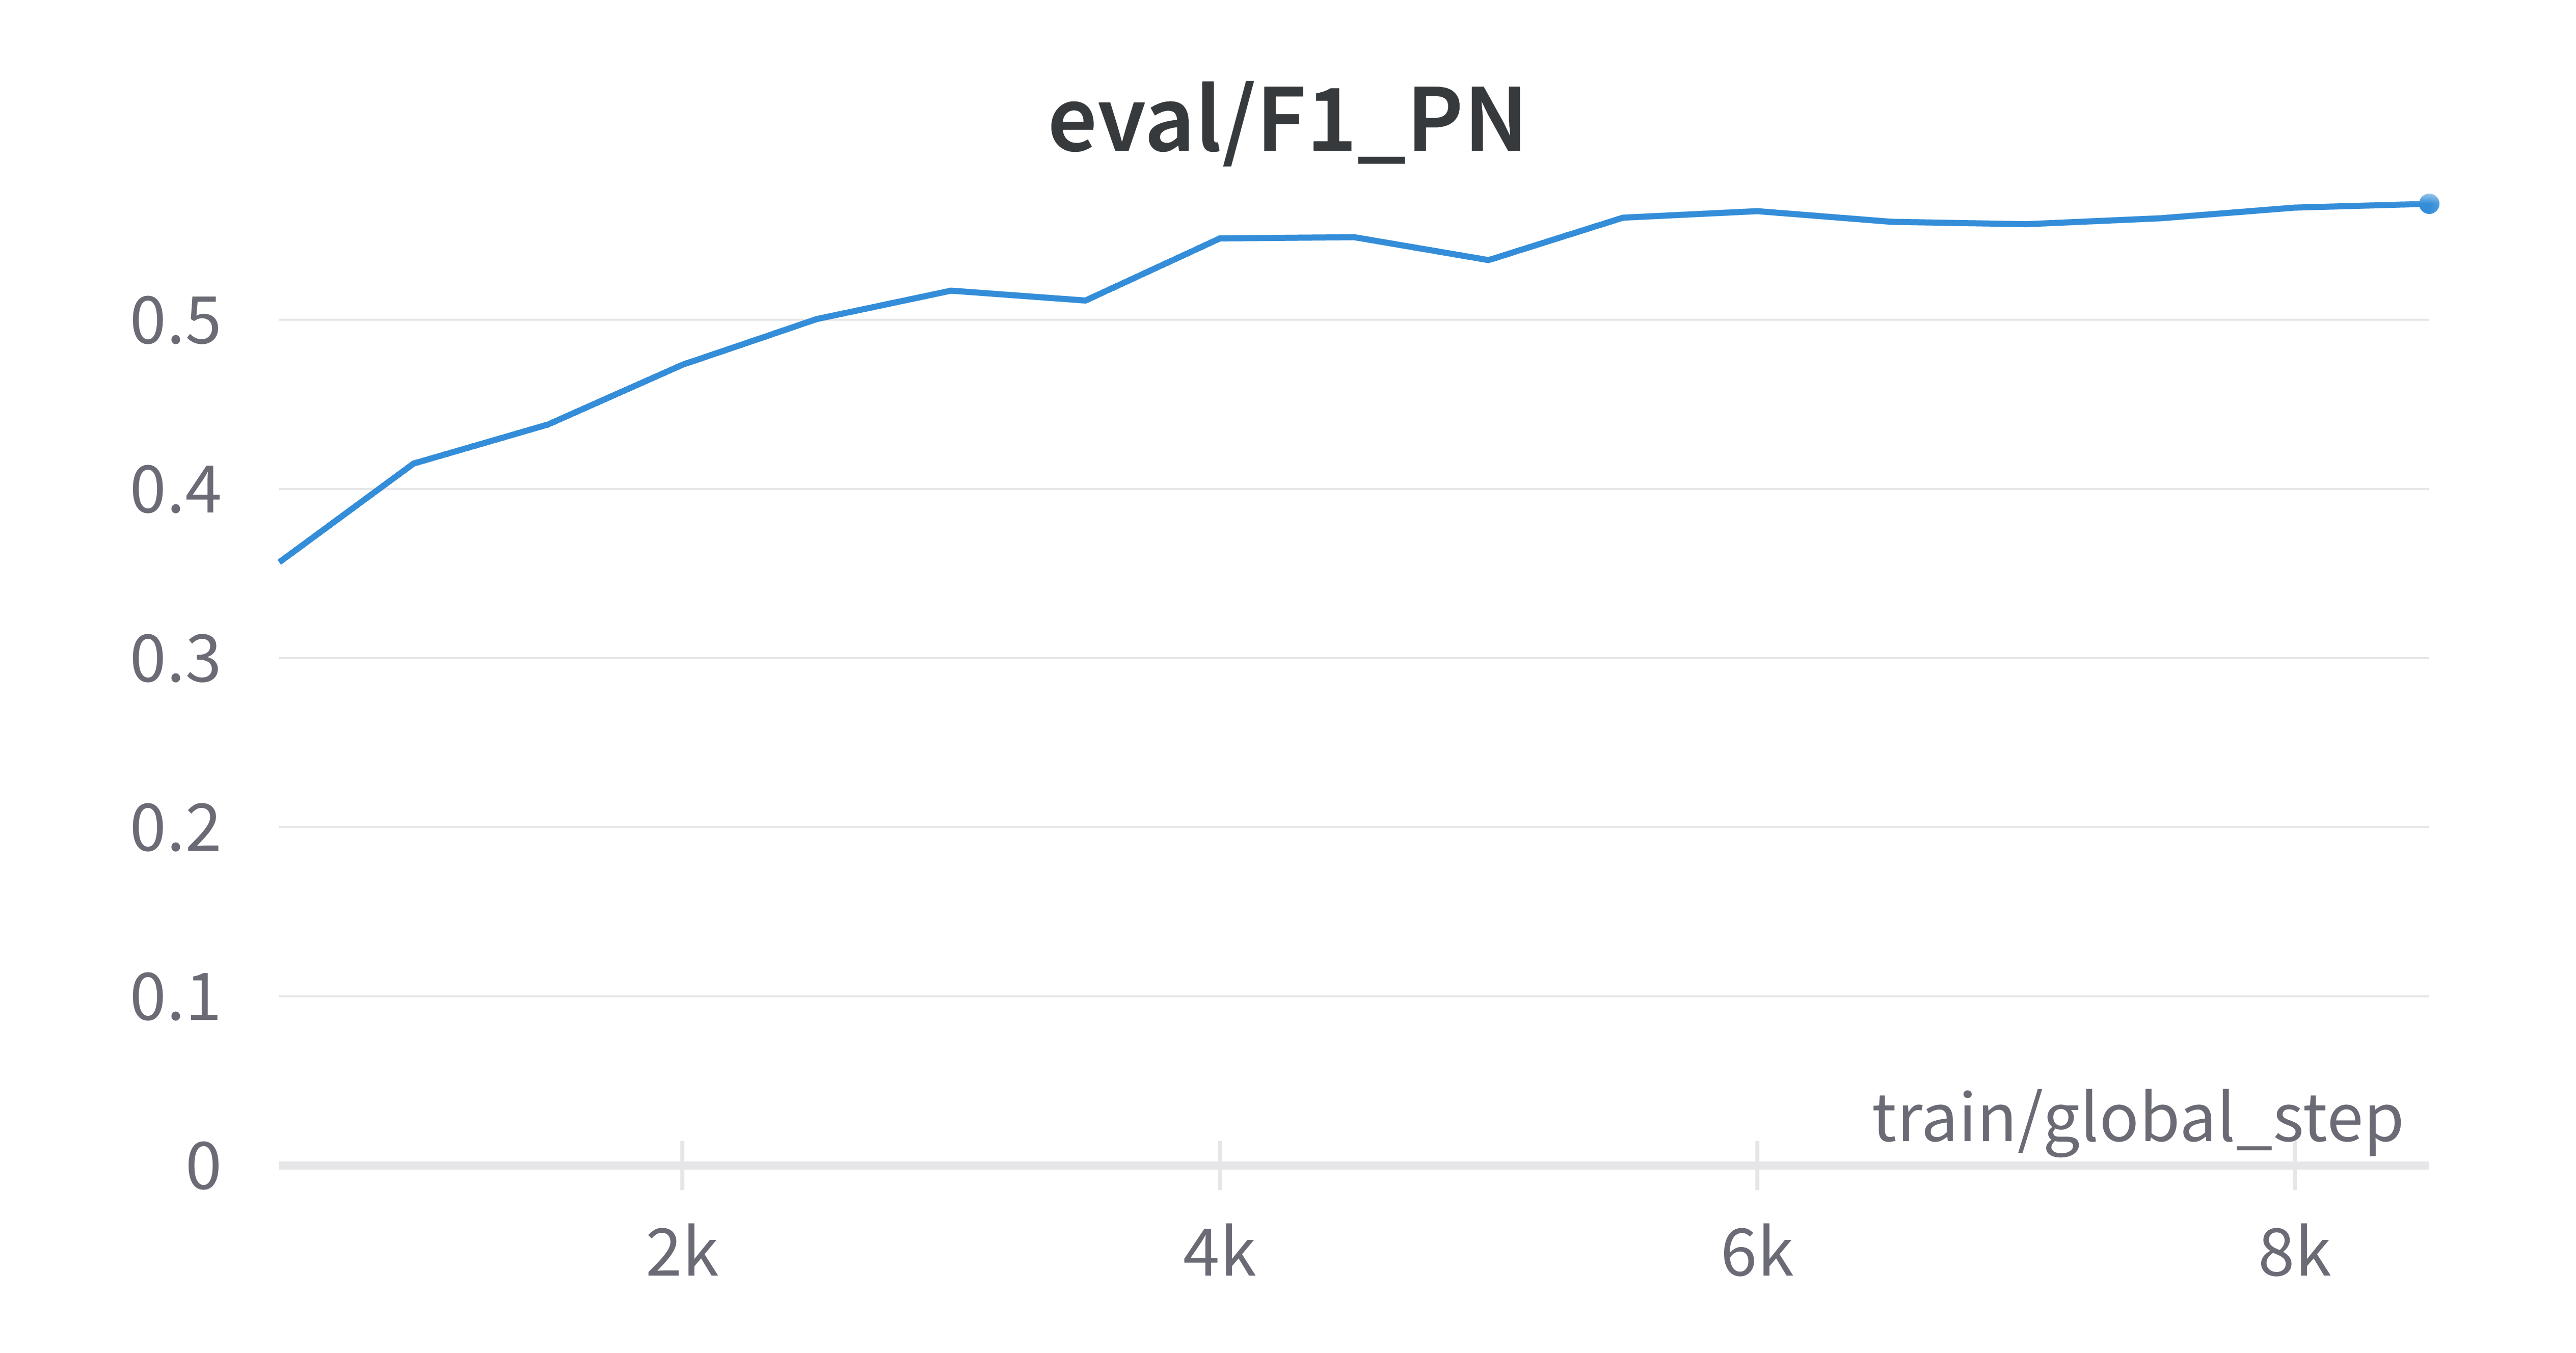

*Круто, получилось побить свое бейзлайн решение. На валидации F1 примерно 0.56, а это близко к победному на соревновании (правда у меня это на валидации, а там все таки на тесте)*

*Инференс*

In [ ]:
test = pd.read_csv(f'{WORK_FOLDER}/final_data.csv',  sep='\t')

In [ ]:
test['sentence'] = test.apply(
    lambda x: add_token(
        x['sentence'], x['entity_tag'], x['entity_pos_start_rel'], 
        x['entity_pos_end_rel']
), axis=1)

tokenized_test = tokenizer(
    test["sentence"].tolist(),
    padding=True,
    truncation=True,
    return_tensors="pt",
)
test_input_ids, test_masks = (
    tokenized_test["input_ids"],
    tokenized_test["attention_mask"],
)
test_entity_token_idxes = list(map(
    lambda p: get_entity_token_idx(p[0], p[1]),
    zip(
        test_input_ids, 
        test["entity_tag"].apply(lambda t: f'[{t}]')
    )
))
test_entity_token_idxes = torch.tensor(test_entity_token_idxes)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
<ipython-input-14-1ebf47481052>:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  test_entity_token_idxes = torch.tensor(test_entity_token_idxes)


In [ ]:
model.load_state_dict(torch.load(f'{WORK_FOLDER}/Runs/checkpoint-500/pytorch_model.bin'))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  outputs = model(
      test_input_ids.to(DEVICE), 
      test_masks.to(DEVICE), 
      test_entity_token_idxes.to(DEVICE)
  )
  predictions = outputs.argmax(-1) - 1

In [ ]:
with open("results2.csv", "w") as csvfile:
    for p in predictions:
        csvfile.write(f"{p}\n")